In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

Creating independent features using a simple qaudratic equation.

In [4]:
m = 200
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X +2 + np.random.randn(m,1)

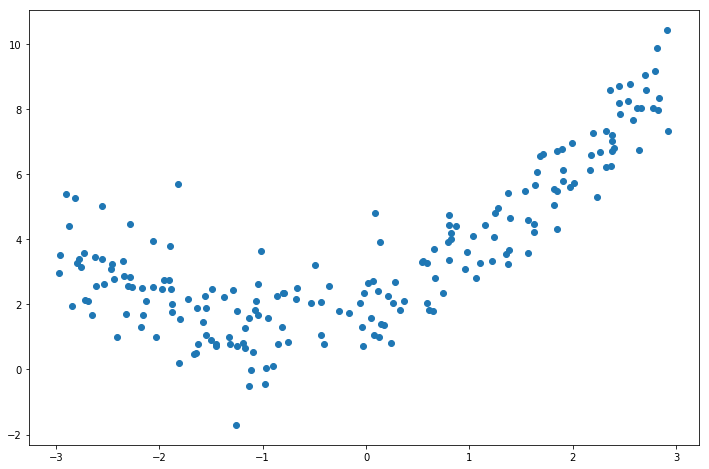

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(X,y,'o')
plt.show()

We will first use a linear regression model.

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [7]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
lin_reg.intercept_,lin_reg.coef_

(array([3.62628573]), array([[0.96661545]]))

Sklearn does not show model summary. We will use statsmodels to have a better understanding of the model.

In [9]:
import statsmodels.api as sm

In [10]:
X_sm = sm.add_constant(X)

In [11]:
model = sm.OLS(y,X_sm).fit()

In [12]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     204.4
Date:                Sat, 06 Apr 2019   Prob (F-statistic):           2.53e-32
Time:                        15:36:44   Log-Likelihood:                -387.42
No. Observations:                 200   AIC:                             778.8
Df Residuals:                     198   BIC:                             785.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6263      0.119     30.348      0.0

R square value is not that good for this particular model and the main reason is that we are fitting a linear regression model for a non linear dataset.

Let's plot the residuals.

In [13]:
y_hat = model.fittedvalues.copy()
y_hat = y_hat.reshape(-1,1)
residual = y - y_hat

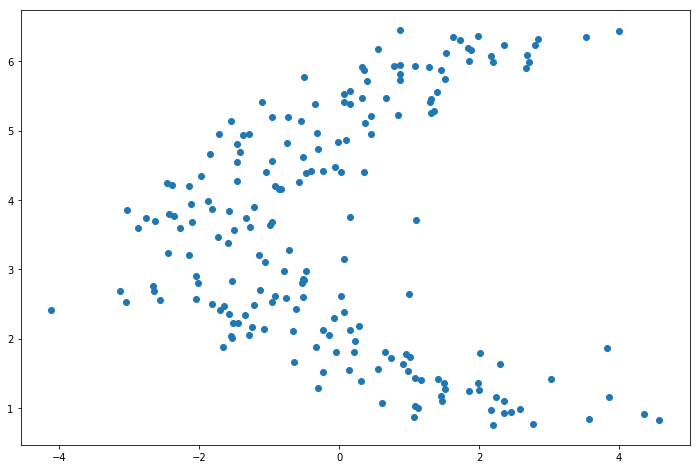

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(residual, y_hat)
plt.show()

There is a clear pattern visible which means the errors are not normally distributed.

Let's use polynomial regression to check if it improves the performance.

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
poly_features = PolynomialFeatures(degree=2,include_bias=False)

In [17]:
X_poly = poly_features.fit_transform(X)

In [18]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [19]:
X[0]

array([-0.75275929])

Now we will use the newly created polynomial features to predict y.

In [20]:
X_sm_poly = sm.add_constant(X_poly)

In [21]:
model = sm.OLS(y,X_sm_poly).fit()

In [22]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     508.7
Date:                Sat, 06 Apr 2019   Prob (F-statistic):           1.57e-78
Time:                        15:36:44   Log-Likelihood:                -276.46
No. Observations:                 200   AIC:                             558.9
Df Residuals:                     197   BIC:                             568.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9866      0.107     18.570      0.0

The R squared value has increased significantly.Also the coefficients of both independent features are positive. Whis is also visible when we plot the data.

In [23]:
y_hat = model.fittedvalues.copy()
y_hat = y_hat.reshape(-1,1)
residual = y - y_hat

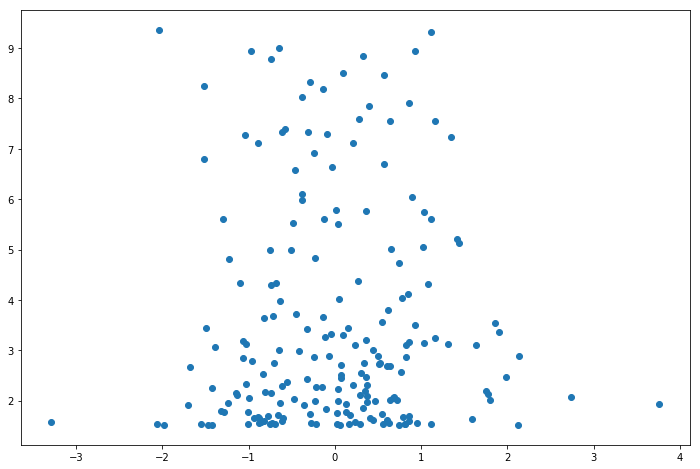

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(residual, y_hat)
plt.show()

According to this residual plot the errors are random.

Accroding to the coefficients the equation of the regression line will be y = 1.9866 + 0.9880 * x1 + 0.5255 * x1^2.

If we take partial derivative of the above equation then we can find the minimum x value after which the y value started increasing.

In [25]:
min_x = -(0.9880/10510)
print('{0:.10f}'.format(min_x))

-0.0000940057
